In [2]:
# 创建 utils 目录结构（如果还没建）
!mkdir -p /content/src/utils
#然后拖入文件

In [20]:
%run /content/module_reload.py

✅ Reloaded: utils.preprocess
✅ Reloaded: utils.eda_tools
✅ Reloaded: utils.tsne_vis
✅ Reloaded: utils.load_data
✅ Reloaded: utils.reduce_mem


<Figure size 640x480 with 0 Axes>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# set path
data_path = "/content/drive/MyDrive/projects/ae-vae-anomaly-detection/data/raw/UNSW-NB15_1.csv"

Mounted at /content/drive


In [21]:
import sys
import importlib

from utils.preprocess import preprocess_pipeline

processed_df = preprocess_pipeline(
    path=data_path,
    col_names=None,
    drop_cols=None,
    drop_duplicates=True,
    group_rare=True,             # 建议开启，在编码前先合并真正无信息的稀有类别
    rare_freq_thresh=0.005,
    categorical_cols=["proto", "state", "service"],
    scale_method="minmax",
    encode_categorical=True,
    log_transform_cols=["sbytes", "dur", "sloss", "djit"],
    drop_corr_features=True,
    save_path = '/content/drive/MyDrive/projects/ae-vae-anomaly-detection/data/processed/cleaned.csv',
    save_as_pickle=False
)

/content/src/utils/load_data.py:28: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, header=None)


✅ Loaded data: 700001 rows × 49 columns
🗑 Removed 59210 duplicate rows
🧠 Encoded 3 columns into 148 features
🔁 Log1p applied to sbytes
🔁 Log1p applied to dur
🔁 Log1p applied to sloss
🔁 Log1p applied to djit
📏 Scaled 185 numeric columns using minmax
🧹 Dropped 7 highly correlated features: ['dloss', 'dpkts', 'dwin', 'ltime', 'proto_tcp', 'proto_udp', 'state_FIN']
📦 Memory usage of dataframe is 875.10 MB
✅ Memory usage after optimization is: 440.00 MB
🔻 Decreased by 49.7%
💾 Saved processed data to /content/drive/MyDrive/projects/ae-vae-anomaly-detection/data/processed/cleaned.csv


In [19]:
processed_df.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,sload,dload,spkts,swin,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,0.000116,0.297625,0.000011,0.121569,0.114173,0.0,0.000095,0.004829,0.000196,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.003909,0.381650,0.000021,0.121569,0.114173,0.0,0.000017,0.000392,0.000392,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000123,0.303716,0.000012,0.121569,0.114173,0.0,0.000099,0.004942,0.000196,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000133,0.297625,0.000011,0.121569,0.114173,0.0,0.000083,0.004214,0.000196,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000129,0.303716,0.000012,0.121569,0.114173,0.0,0.000095,0.004730,0.000196,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


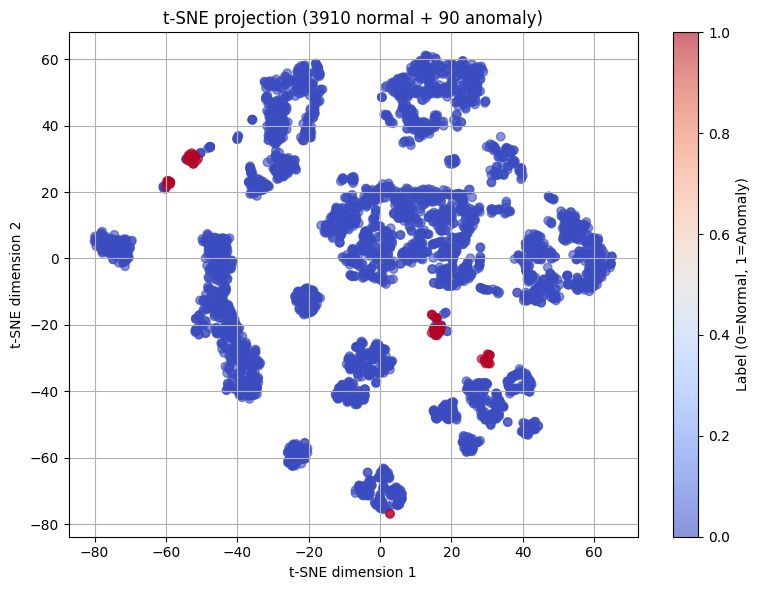

In [16]:
# 使用函数（确保你已经定义了 processed_df 且包含 'label' 列）
from utils.tsne_vis import plot_tsne_projection

plot_tsne_projection(processed_df, label_col='label', sample_size=4000, standardize=False)